### Introduction
__Business problem: SyriaTel Churn Prediction__

__Presenter: Joanne Kariuki__




__Stakeholder: SyriaTel Shareholders and Business Team__


## Project Goals
- **Examined** Customer behavior and service usage patterns from the dataset to understand key indicators of churn.  
- **Identified** The most influential features contributing to customer churn, such as frequent customer service interactions. 
- **Recommended** Strategic actions to proactively retain high-risk customers.

### Data Understanding
The data source for this analysis was gotten from 'bigml_59c28831336c6604c800002a.csv'
We will:
- Import the relevant libraries
- Load the data into a dataframe
- Explore and extract data for my analysis
- Data Visualization interpratation
- Provide Recommendations


__Import libraries__

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


__Load Data__

In [9]:
data = pd.read_csv('C:/Projects/Phase3_churn_prediction/bigml_59c28831336c6604c800002a.csv', index_col=0)
data.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


__Data Understanding__

In [10]:
data.shape

(3333, 20)

In [11]:
print(data.info())
print(data.describe())
print(data['churn'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, KS to TN
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   float6

## Data Cleaning

In [15]:
# check for missing values
print(data.isnull().sum())

account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [17]:
# Drop irrelevant columns
data_clean = data.drop(columns=['phone number'])

# Label encode binary features
le_international = LabelEncoder()
le_voicemail = LabelEncoder()
data_clean['international plan'] = le_international.fit_transform(data_clean['international plan'])
data_clean['voice mail plan'] = le_voicemail.fit_transform(data_clean['voice mail plan'])

# Split features and target
X = data_clean.drop(columns=['churn'])
y = data_clean['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['total day minutes', 'account length']  # Add all numerical columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Preprocessing complete!")
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Preprocessing complete!
Training set: (2666, 18), Test set: (667, 18)


In [20]:
data_clean

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,
KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


## Modelling

### Logistic Regression: Baseline Model

In [37]:
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred_log = baseline_model.predict(X_test)

print("\n--- Logistic Regression Evaluation ---")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))



--- Logistic Regression Evaluation ---
[[553  13]
 [ 86  15]]
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.54      0.15      0.23       101

    accuracy                           0.85       667
   macro avg       0.70      0.56      0.58       667
weighted avg       0.82      0.85      0.81       667



c:\Projects\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


__Visualisation - Confusion Matrix for Logistic Regression__

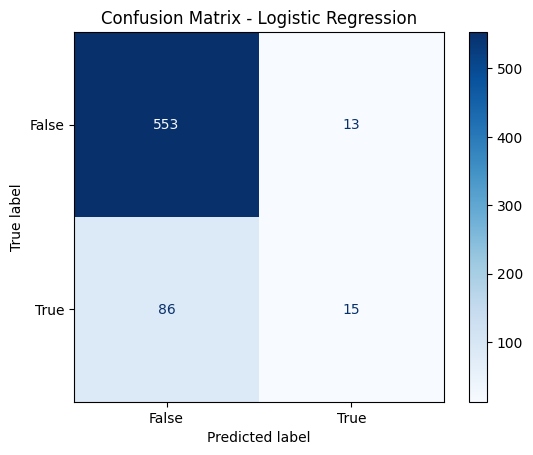

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression
ConfusionMatrixDisplay.from_estimator(baseline_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Decision Tree Classifier: Comparison Model


In [19]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n--- Decision Tree Evaluation ---")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


--- Decision Tree Evaluation ---
[[539  27]
 [ 27  74]]
              precision    recall  f1-score   support

       False       0.95      0.95      0.95       566
        True       0.73      0.73      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667



__Visualisation - Confusion Matrix for Decision Tree__

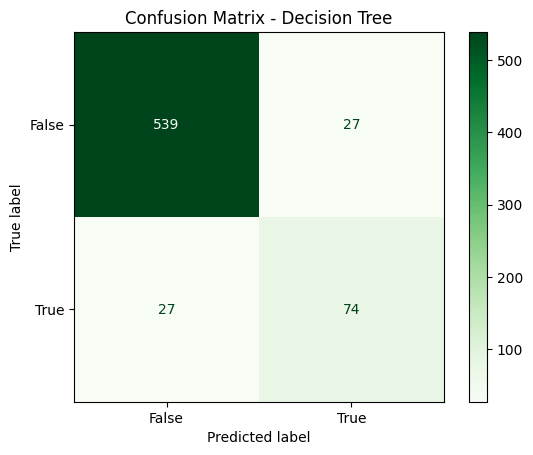

In [26]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

__Decision Tree with hyperparameters__


In [21]:
params = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 10, 20]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=5)
grid_dt.fit(X_train, y_train)
y_pred_tuned = grid_dt.predict(X_test)

print("\n--- Tuned Decision Tree Evaluation ---")
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


--- Tuned Decision Tree Evaluation ---
[[557   9]
 [ 33  68]]
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       566
        True       0.88      0.67      0.76       101

    accuracy                           0.94       667
   macro avg       0.91      0.83      0.86       667
weighted avg       0.93      0.94      0.93       667



__Interpretation__

Decision Tree is Clearly Superior for Churn Detection
- 73% recall vs logistic's 15% - Identifies more actual churners
- Maintains reasonable 73% precision (only 27% false alarms)

### ROC Curve__

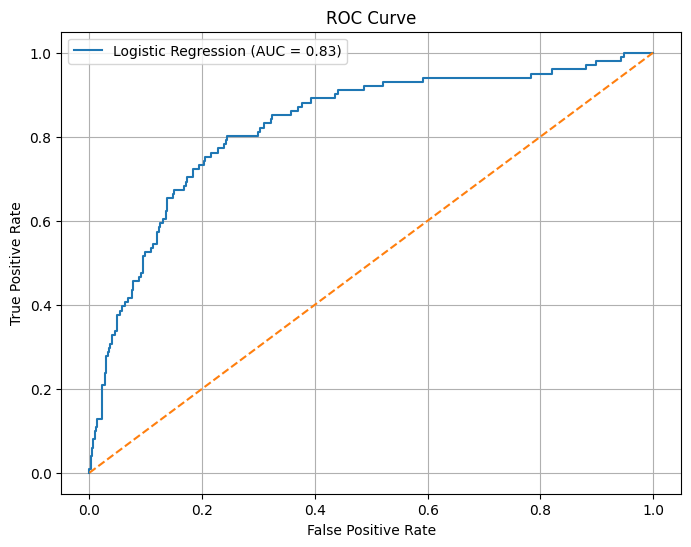

In [22]:
y_probs = baseline_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

__Interpretation__
- The closer the curve is to the top-left corner, the better the model is at distinguishing churners.This means there's an 83% chance the model ranks a random churner higher than a random non-churner.
- A diagonal line means random guessing (AUC = 0.5).
- Our Logistic Regression AUC = 0.83, indicating strong model performance.

## Feature importance & Evaluation

__Logistic Regression__

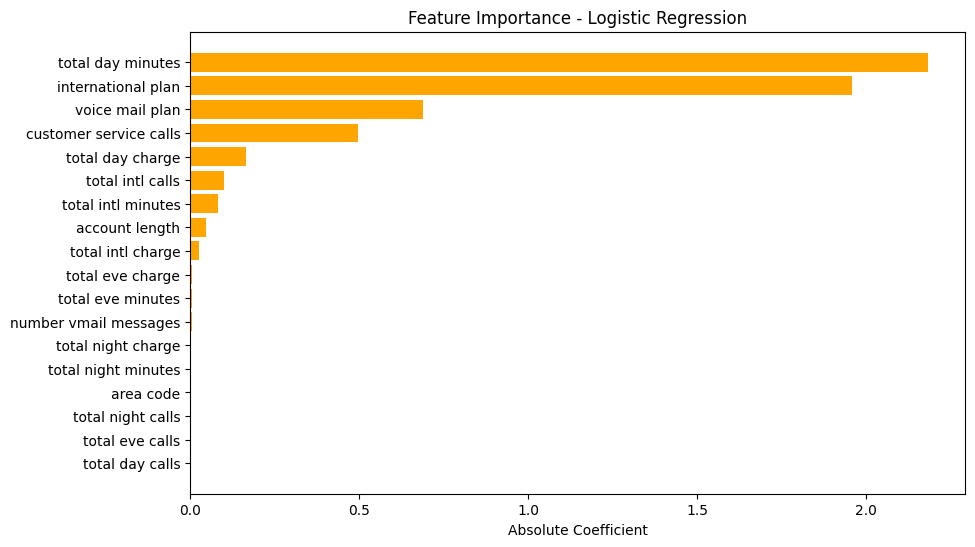

In [30]:
# Get feature importance (absolute value of coefficients)
coefs = baseline_model.coef_[0]
features = X_train.columns
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
    'AbsCoefficient': np.abs(coefs)
}).sort_values('AbsCoefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['AbsCoefficient'], color='orange')
plt.xlabel("Absolute Coefficient")
plt.title("Feature Importance - Logistic Regression")
plt.gca().invert_yaxis()
plt.show()

__Decision Tree__


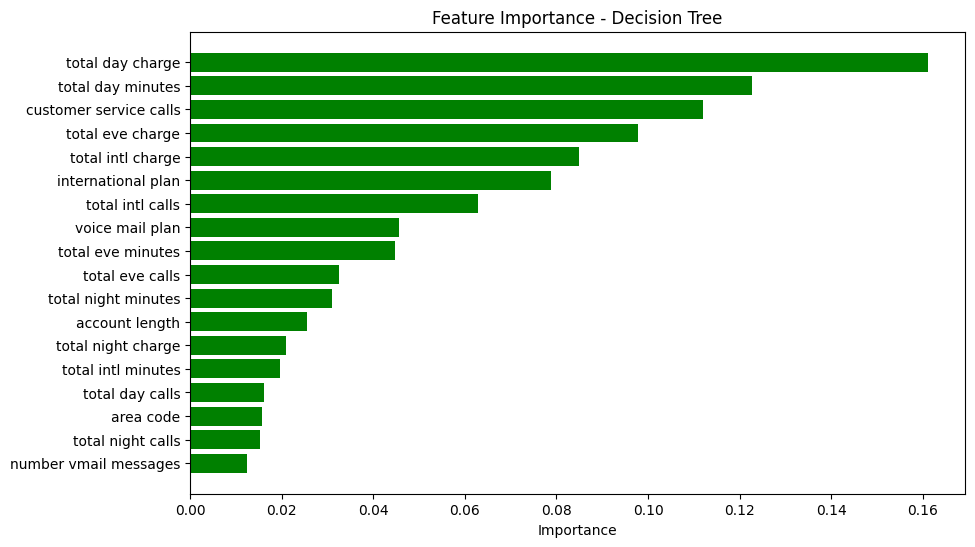

In [31]:
importances = dt.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Decision Tree")
plt.barh(range(len(importances)), importances[indices], align="center", color='green')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

__Interpretation:__
Both models consistently highlight call duration metrics (particularly daytime usage) as the strongest predictors of churn, with total day minutes ranking #1 in logistic regression and total day charge being the most important feature in the decision tree. 

__Other top predictors of churn:__
Customer Service Calls
International Plans

## Conclusion

Following my analysis:
- The tuned deision tree model works best as it catches 67% of churners(vs 15% with logistic regression)
- The tuned decision tree model is also 88% accurate when predicting churn and makes only 9 false alarms per 566 customers
- The key warning signs for customers likely to churn are:
   - High daytime call usage
   - Many customer service calls
   - Cutomers that have an international plan